# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [4]:
df_colors = pd.read_csv('data/colors.csv')

In [5]:
df_colors_clean = df_colors.drop([0,134])
df_colors_clean

,id,name,rgb,is_trans
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
5,4,Red,C91A09,f
...,...,...,...,...
129,1003,Glitter Trans-Light Blue,68BCC5,t
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t


In [6]:
df_colors_clean['name'].nunique()


133

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [7]:
amount_opaque = df_colors_clean.value_counts('is_trans').f
print(f"Amount of opaque colors: {amount_opaque}")

Amount of opaque colors: 105


In [8]:
amount_transparent = df_colors_clean.value_counts('is_trans').t
print(f"Amount of transparent colors: {amount_transparent}")

Amount of transparent colors: 28


### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows.

In [10]:
df_sets = pd.read_csv('data/sets.csv')


In [11]:
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [12]:
df_sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [24]:
first_sets = df_sets.loc[df_sets['year'].nsmallest().index]
for index, row in first_sets.iterrows():
    print(f"Set: {row['name']} (released on {row['year']})")

Set: Extra-Large Gift Set (ABB) (released on 1949)
Set: Large Gift Set (ABB) (released on 1949)
Set: Medium Gift Set (ABB) (released on 1949)
Set: Small Brick Set (ABB) (released on 1949)
Set: Small Doors and Windows Set (ABB) (released on 1949)


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [29]:
df_sets[df_sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts.

In [25]:
largest_sets = df_sets.loc[df_sets['num_parts'].nlargest(5, keep='all').index]
for index, row in largest_sets.iterrows():
    print(f"Set: {row['name']} (released on {row['year']}) - {row['num_parts']} parts")

Set: The Ultimate Battle for Chima (released on 2015) - 9987 parts
Set: UCS Millennium Falcon (released on 2017) - 7541 parts
Set: Hogwarts Castle (released on 2018) - 6020 parts
Set: Taj Mahal (released on 2017) - 5923 parts
Set: Taj Mahal (released on 2008) - 5922 parts


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [40]:
sets_by_year = df_sets.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [51]:
print(f"No. of sets introduced in 1955: {sets_by_year.loc[1955, 'set_num']}")
print(f"No. of sets introduced in 2019: {sets_by_year.loc[2019, 'set_num']}")
print(f"Ratio (2019 to 1955): {int(sets_by_year.loc[2019, 'set_num'])/int(sets_by_year.loc[1955, 'set_num'])}")

No. of sets introduced in 1955: 28
No. of sets introduced in 2019: 840
Ratio (2019 to 1955): 30.0


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.

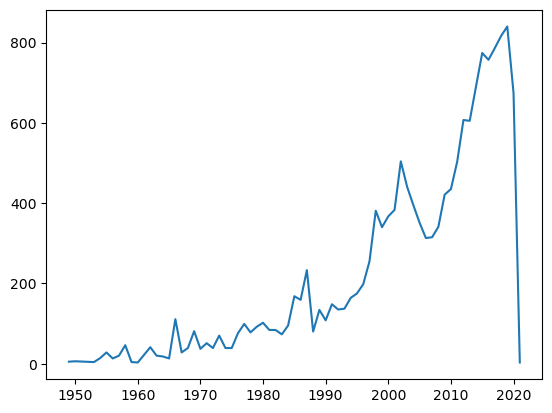

In [38]:
sets_by_year = df_sets.groupby('year').count()
plt.plot(sets_by_year['set_num'])

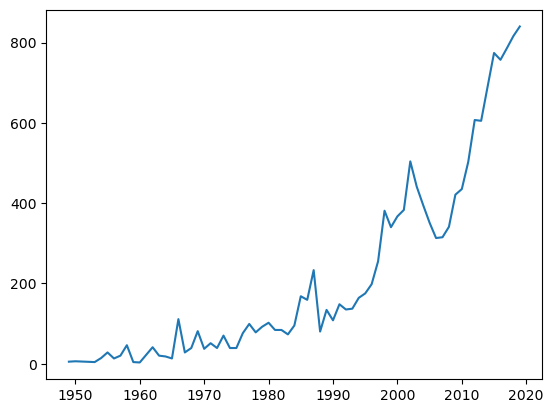

In [39]:
sets_by_year = df_sets.groupby('year').count()
plt.plot(sets_by_year['set_num'][:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [56]:
themes_by_year = df_sets.groupby('year').agg({'theme_id': pd.Series.nunique})

In [60]:
themes_by_year.rename(columns={'theme_id':'nr_themes'}, inplace=True)
themes_by_year

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

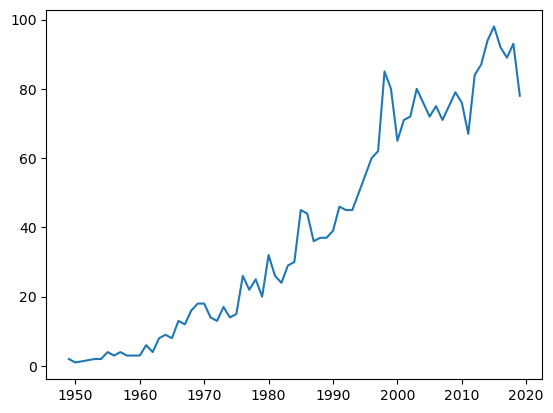

In [61]:
plt.plot(themes_by_year['nr_themes'][:-2])

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'Numer of Themes')

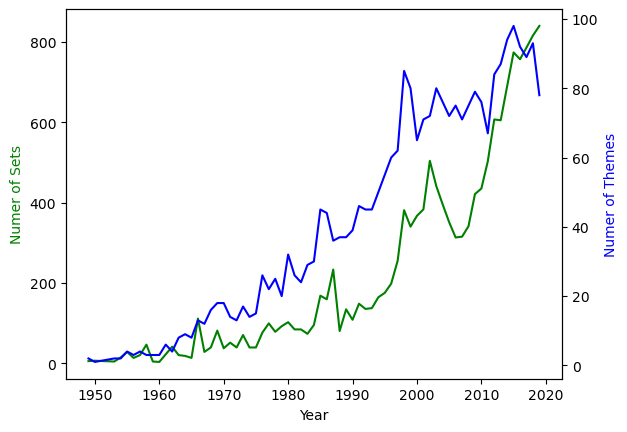

In [69]:
ax1 = plt.gca()
ax2 = ax1.twinx() 

ax1.plot(sets_by_year['set_num'][:-2], color='green')
ax2.plot(themes_by_year['nr_themes'][:-2], color='blue')

ax1.set_xlabel('Year')
ax1.set_ylabel('Numer of Sets', color='green')
ax2.set_ylabel('Numer of Themes', color='blue')



**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [86]:
avg_size_by_year = df_sets.groupby('year').agg({'num_parts': pd.Series.mean})
avg_size_by_year.rename(columns={'num_parts':'avg_num_parts'}, inplace=True)
avg_size_by_year

,avg_num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


In [84]:
print(f"Avg. parts number in sets introduced in 1954: {avg_size_by_year.loc[1954, 'avg_num_parts']}")
print(f"Avg. parts number in sets introduced in 2017: {avg_size_by_year.loc[2017, 'avg_num_parts']}")
ratio = round( float(avg_size_by_year.loc[2017, 'avg_num_parts']) / float(avg_size_by_year.loc[1954, 'avg_num_parts']) , 2)
print(f"Ratio (2017 to 1954): {ratio}")

Avg. parts number in sets introduced in 1954: 12.357142857142858
Avg. parts number in sets introduced in 2017: 221.8409669211196
Ratio (2017 to 1954): 17.95


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart?

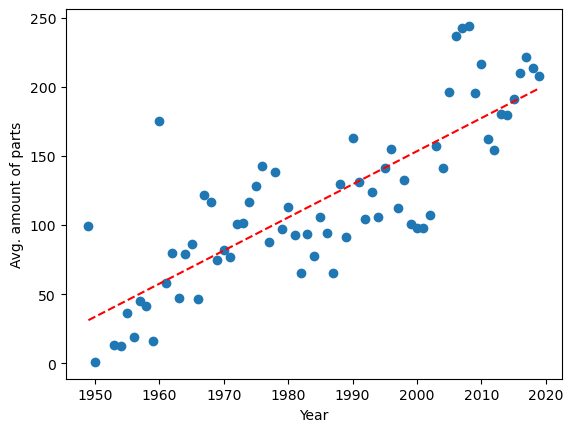

In [99]:
plt.scatter(avg_size_by_year.index[:-2] ,avg_size_by_year.avg_num_parts[:-2])

plt.xlabel('Year')
plt.ylabel('Avg. amount of parts')

z = np.polyfit(avg_size_by_year.index[:-2], avg_size_by_year.avg_num_parts[:-2], 1)
p = np.poly1d(z)
plt.plot(avg_size_by_year.index[:-2],p(avg_size_by_year.index[:-2]),"r--")

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

In [102]:
set_theme_count = df_sets['theme_id'].value_counts()
set_theme_count[:5]

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [103]:
df_themes = pd.read_csv('data/themes.csv')
df_themes

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0


In [107]:
df_themes[df_themes['name'].str.contains('Star Wars', case=False)]


,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [122]:
for index, row in df_themes[df_themes['name'].str.contains('Star Wars', case=False)].iterrows():
    theme_id = int(row['id']) 
    print(f"Sets fot theme_id {theme_id}:") 
    print(df_sets[df_sets.theme_id == theme_id])
    print()

Sets fot theme_id 18:
       set_num                                name  year  theme_id  num_parts
8786   65081-1  R2-D2 / C-3PO Droid Collectors Set  2002        18          1
12051   8000-1                           Pit Droid  2000        18        223
12058   8001-1                        Battle Droid  2000        18        336
12066   8002-1                     Destroyer Droid  2000        18        567
12071   8007-1                               C-3PO  2001        18        339
12072   8008-1                        Stormtrooper  2001        18        360
12073   8009-1                               R2-D2  2002        18        239
12074   8010-1                         Darth Vader  2002        18        388
12081   8011-1                          Jango Fett  2002        18        425
12083   8012-1                  Super Battle Droid  2002        18        378
15273  K8008-1      Darth Vader / Stormtrooper Kit  2002        18          0

Sets fot theme_id 158:
           set_num

### Merging (i.e., Combining) DataFrames based on a Key


In [124]:
set_theme_count = pd.DataFrame({'id':set_theme_count.index,
                                'set_count':set_theme_count.values})
set_theme_count

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
...,...,...
566,307,1
567,215,1
568,361,1
569,210,1


In [127]:
merged_df = pd.merge(set_theme_count, df_themes, on='id')
merged_df[:10]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
5,505,328,Basic Set,504.0
6,497,310,Books,NaN
7,632,299,Town,504.0
8,371,273,Supplemental,365.0
9,516,248,Duplo and Explore,507.0


<BarContainer object of 10 artists>

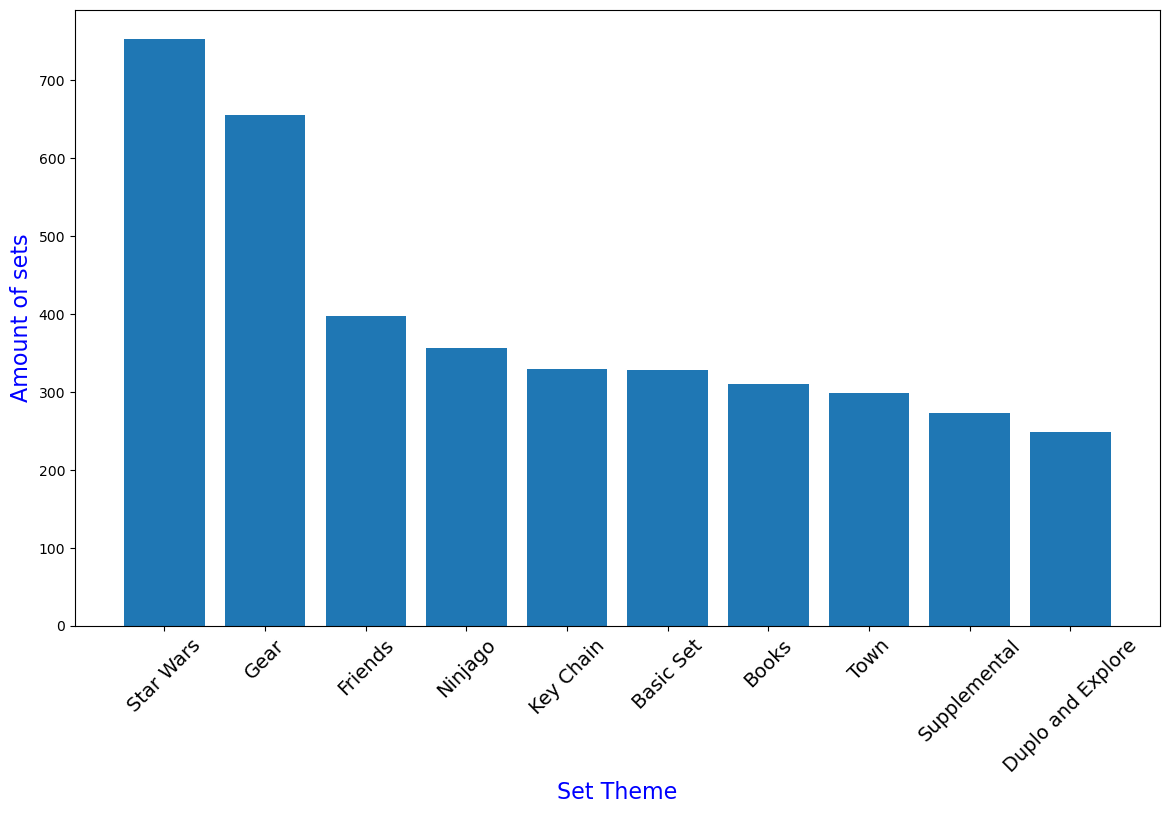

In [140]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.xticks(fontsize=14)
plt.xlabel('Set Theme', fontsize=16, color='b')
plt.ylabel('Amount of sets', fontsize=16, color='b')

plt.bar(merged_df.name[:10], merged_df.set_count[:10])
